# Data Madness
### Rodrigo Alejandro Chávez Mulsa & Lillian Alice Wu

Data retrieved from: https://www.kaggle.com/mohalim/video-games-sales

Grading rubric:

* Key idea: Do you have main takeaways?
* Scope: Given the dataset selected, did you choose the appropriate level of complexity to explain everything?
* Process: Did you follow the standard data analysis process (EDA, models, evaluation)?
* Solution: Is the analysis effective and answering the intended questions?
* Presentation: Is your video clear, engaging and effective? Questions: Did you answer them properly? 

*Use this assignment to submit a link where your video is to be found (e.g. youtube, vimeo, etc.) and submit a 1/2-1 page abstract of your approach. Mention your partner (you do not need to do double submissions).*

In [1]:
import IPython.core.display
import matplotlib

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data/vgsales.csv")
# df.value.astype(int, copy=False);
df.shape

(16719, 16)

In [3]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df.Year_of_Release.value_counts()
# df.shape
# df.loc[0]

### Deal with missing values and wrong types

In [5]:
df.Name.isnull()
df = df[df['Name'].notna()]
# df.User_Score.isnull().sum()

In [6]:
#non-numeric value convert to NaN
df['User_Score'] = df['User_Score'].apply(pd.to_numeric, errors='coerce')
# df.dtypes

In [7]:
df[['Publisher', 'Developer','Rating']]=df[['Publisher', 'Developer','Rating']].fillna(value='missing')
df[['Year_of_Release','Critic_Count', 'Critic_Score', 'User_Count']] = df[['Year_of_Release','Critic_Count', 'Critic_Score', 'User_Count']].astype('Int64')
# df.dtypes

In [8]:
cols_float = df.select_dtypes(include=['number']).columns
df[cols_float] = df[cols_float].fillna(-1)
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,-1.00,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-1,-1,-1.0,-1,missing,missing
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,-1.00,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1,-1,-1.0,-1,missing,missing


In [9]:
#Compute missing global sales based on sales in available regions
for i, r in df.iterrows():
    if r.Global_Sales<0:
        df.Global_Sales.at[i] = sum(r[c] if (('Sales' in c) and (r[c]>0)) else 0 for c in r.index)
df[df.Global_Sales<0]
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,-1.00,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-1,-1,-1.0,-1,missing,missing
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,-1.00,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1,-1,-1.0,-1,missing,missing


## Visualize stuff

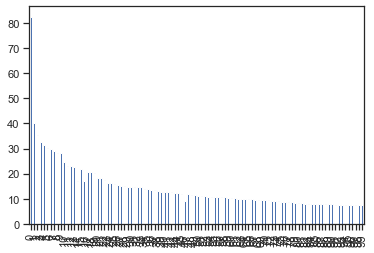

In [10]:
df.sort_values(by=['Global_Sales'],ascending=False)
df.Global_Sales[:100].plot.bar()

In [18]:
df[df['Name'] == 'Minecraft']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
72,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.70,2.65,0.02,0.81,9.18,-1,-1,-1.0,-1,missing,missing
180,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,2.03,2.37,0.00,0.87,5.26,-1,-1,-1.0,-1,missing,missing
261,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1.48,2.02,0.14,0.68,4.32,-1,-1,-1.0,-1,missing,missing
543,Minecraft,XOne,2014,Misc,Microsoft Game Studios,1.61,0.90,0.00,0.25,2.76,-1,-1,-1.0,-1,missing,missing
868,Minecraft,PSV,2014,Misc,Sony Computer Entertainment Europe,0.18,0.64,0.90,0.24,1.96,-1,-1,-1.0,-1,missing,missing
2973,Minecraft,WiiU,2016,Misc,Microsoft Game Studios,0.28,-1.00,0.18,0.04,0.68,-1,-1,-1.0,-1,missing,missing


In [20]:
df.Platform.unique()
df[df.Platform=='PC']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
85,The Sims 3,PC,2009,Simulation,Electronic Arts,0.99,6.42,0.00,0.60,8.01,86,75,7.6,886,The Sims Studio,T
138,World of Warcraft,PC,2004,Role-Playing,Activision,0.08,6.21,0.00,0.00,6.29,93,57,7.3,2182,Blizzard Entertainment,T
192,Diablo III,PC,2012,Role-Playing,Activision,2.44,2.16,0.00,0.54,5.14,88,86,4.0,9629,Blizzard Entertainment,M
195,Microsoft Flight Simulator,PC,1996,Simulation,Microsoft Game Studios,3.22,1.69,0.00,0.20,5.12,-1,-1,-1.0,-1,missing,missing
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,Activision,2.57,1.68,0.00,0.58,4.84,93,82,8.2,3052,Blizzard Entertainment,T
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,Activision,1.70,2.27,0.00,0.23,4.21,-1,-1,-1.0,-1,missing,missing
284,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12,96,24,9.1,3161,Valve Software,M
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,Activision,2.57,1.52,0.00,0.00,4.09,91,46,7.9,785,Blizzard Entertainment,T
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,Bethesda Softworks,-1.00,2.12,0.00,0.60,3.88,94,32,8.1,9073,Bethesda Game Studios,M
330,The Sims: Unleashed,PC,2002,Simulation,Electronic Arts,2.03,1.56,0.00,-1.00,3.76,79,21,8.0,29,Maxis,T
